## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `bees_num` | The total number of bee individuals in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plot. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## ❓ Questions
1. What is the difference between a native and non-native bee species?
2. What is the difference between a native and non-native plant species?
3. What is the difference between a parasitic and non-parasitic bee species?
4. What is the difference between a specialist and generalist bee species?
5. What identifies the plant species a bee species prefers?


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

pd.set_option('display.max_colwidth', 100)


In [10]:
df = pd.read_csv("plants_and_bees.csv")

df.head()

,sample_id,bees_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   bees_num        1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


In [12]:
df.describe()

,sample_id,bees_num,time,parasitic,nonnative_bee
count,1250.000000,1250.000000,1250.000000,1187.000000,1189.000000
mean,17441.209600,22.450400,1069.160000,0.074136,0.029437
std,22.649293,13.691074,199.032524,0.262103,0.169098
min,17400.000000,1.000000,900.000000,0.000000,0.000000
25%,17424.000000,12.000000,930.000000,0.000000,0.000000
50%,17442.000000,20.000000,1015.000000,0.000000,0.000000
75%,17461.000000,32.000000,1105.000000,0.000000,0.000000
max,17481.000000,60.000000,1730.000000,1.000000,1.000000


In [13]:
df.describe(exclude='number')

,date,season,site,native_or_non,sampling,plant_species,bee_species,sex,specialized_on,nesting,status
count,1250,1250,1250,1250,1250,1250,1250,1250,7,1196,15
unique,9,2,3,2,2,24,93,2,2,6,3
top,06/13/2017,early.season,B,non-native,pan traps,None,Halictus poeyi/ligatus,f,Penstemon,ground,vulnerable (IUCN)
freq,219,936,459,644,820,820,252,1047,5,970,7


In [14]:
# missing values in percentage
df.isnull().sum()/len(df)*100


sample_id          0.00
bees_num           0.00
date               0.00
season             0.00
site               0.00
native_or_non      0.00
sampling           0.00
plant_species      0.00
time               0.00
bee_species        0.00
sex                0.00
specialized_on    99.44
parasitic          5.04
nesting            4.32
status            98.80
nonnative_bee      4.88
dtype: float64

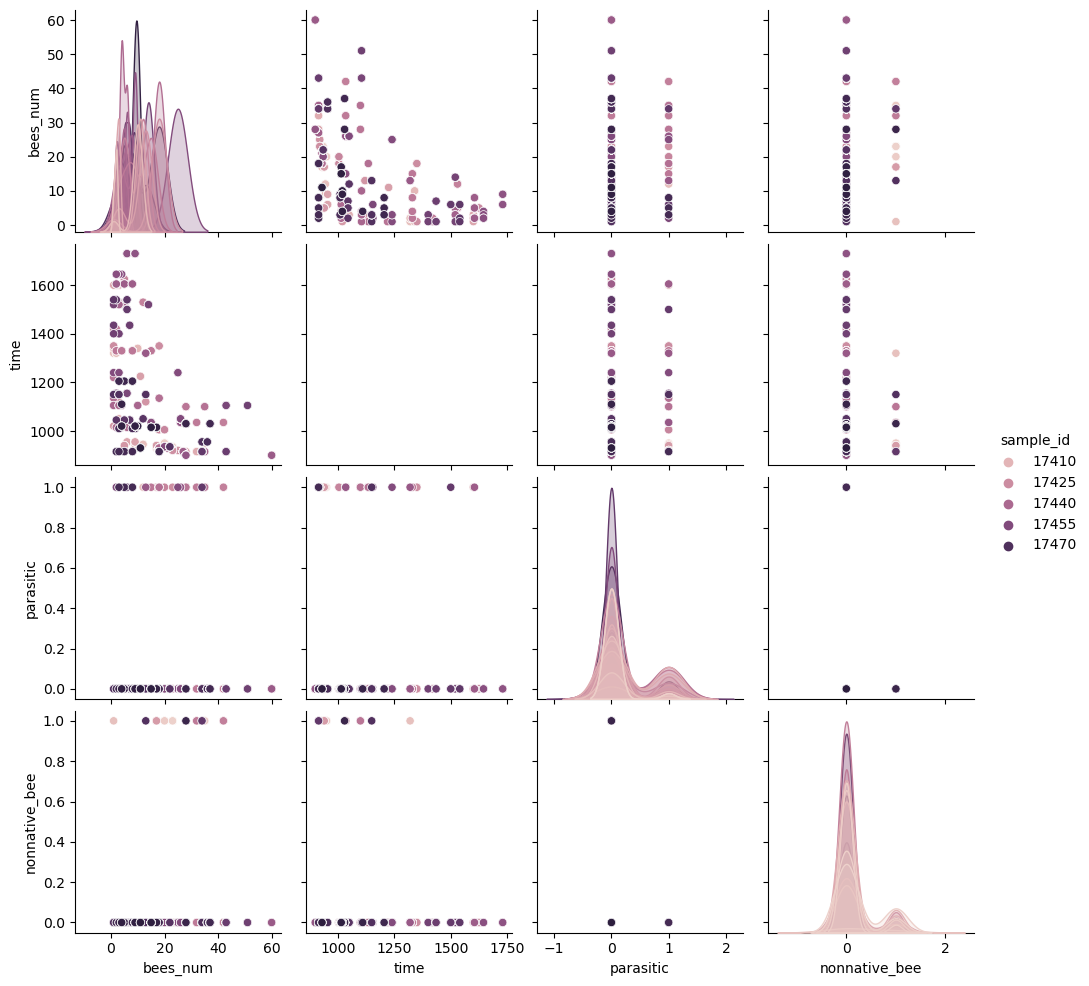

In [15]:
sns.pairplot(df, hue='sample_id')

<AxesSubplot:>

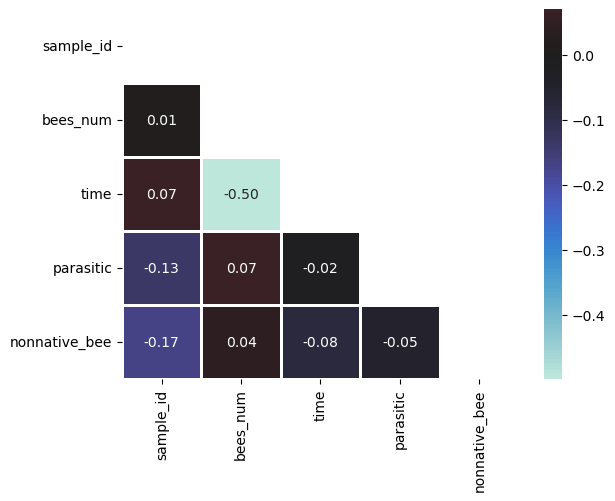

In [18]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    df.corr(), 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    center=0
    )

<AxesSubplot:>

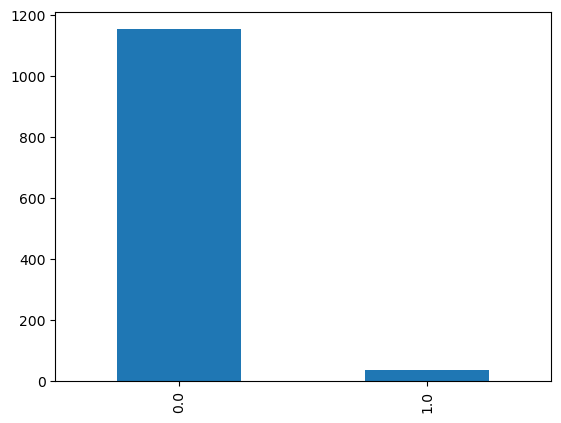

In [24]:
# explore the distribution nonnative_bee column
df['nonnative_bee'].value_counts().plot(kind='bar')